# Acqusition Function Optimization with Genetic Algorithm

As an alternative to gradient-based optimizations, the Genetic Algorithm can be used for optimizing Acqusition functions

In [1]:
from copy import deepcopy
from time import time

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from bofire.benchmarks import api as benchmarks
from bofire.data_models.strategies import api as strategies_data_models
from bofire.data_models.constraints import api as constraints_data_models
from bofire.strategies import api as strategies

## The optimizer can handle a mix of categorical and numerical inputs

## The GA supports multiple different constraints
We use the Himmelblau function, which has 2 Inputs

In [4]:
benchmark = benchmarks.Himmelblau()
# generate experiments
experiments = benchmark.f(benchmark.domain.inputs.sample(10), return_complete=True)

In [5]:
optimizer = strategies_data_models.GeneticAlgorithm(
    population_size=100,
    n_max_gen=100,
    verbose=True,
)

In [6]:
benchmark_grid = np.hstack([x.reshape((-1, 1)) for x in np.meshgrid(np.linspace(-6, 6, 100), np.linspace(-6, 6, 100))])
benchmark_grid = pd.DataFrame(benchmark_grid, columns=benchmark.domain.inputs.get_keys())
benchmark_grid["y"] = benchmark.f(benchmark_grid)["y"]

In [7]:
def get_proposals(domain, n: int = 10) -> pd.DataFrame: 
    strategy = strategies_data_models.SoboStrategy(domain=domain, acquisition_optimizer=optimizer)    
    # map to strategy object, and train the model
    strategy = strategies.map(strategy)
    strategy.tell(experiments)
    t0 = time()
    proposals = strategy.ask(n)
    print(f"Generated {len(proposals)} experiments, Time taken: {time() - t0:.2f}s")
    return proposals

#### Linear Equality and Inequality Constraints are handled by a repair function, using QP

In [8]:
# generate different cases
domain = deepcopy(benchmark.domain)
domain.constraints.constraints += [
    constraints_data_models.LinearEqualityConstraint(  # x_1 + x_2 = 3
        features=["x_1", "x_2"],
        coefficients=[1, 1],
        rhs=3,
    ),
    constraints_data_models.LinearInequalityConstraint(  # x_2 <= x_1
        features=["x_1", "x_2"],
        coefficients=[-1, 1],
        rhs=0,
    ),
]

In [9]:
proposals = get_proposals(domain)

/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |      100 | -4.053373E+00 | -4.331825E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


     2 |      200 | -4.231734E+00 | -4.340819E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


     3 |      300 | -4.279587E+00 | -4.346879E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


     4 |      400 | -4.306132E+00 | -4.356780E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


     5 |      500 | -4.317987E+00 | -4.358097E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


     6 |      600 | -4.327679E+00 | -4.358097E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


     7 |      700 | -4.335230E+00 | -4.364306E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


     8 |      800 | -4.341402E+00 | -4.364306E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


     9 |      900 | -4.346292E+00 | -4.377093E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    10 |     1000 | -4.349804E+00 | -4.377093E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    11 |     1100 | -4.353942E+00 | -4.384023E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    12 |     1200 | -4.355707E+00 | -4.384023E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    13 |     1300 | -4.357962E+00 | -4.384023E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    14 |     1400 | -4.360427E+00 | -4.397328E+00
    15 |     1500 | -4.362841E+00 | -4.397328E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    16 |     1600 | -4.364092E+00 | -4.397328E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    17 |     1700 | -4.365909E+00 | -4.397328E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    18 |     1800 | -4.368301E+00 | -4.399988E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    19 |     1900 | -4.370405E+00 | -4.399988E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    20 |     2000 | -4.371568E+00 | -4.400217E+00
    21 |     2100 | -4.374069E+00 | -4.400217E+00
    22 |     2200 | -4.375856E+00 | -4.400217E+00
    23 |     2300 | -4.377334E+00 | -4.400217E+00
    24 |     2400 | -4.379117E+00 | -4.400217E+00
    25 |     2500 | -4.381352E+00 | -4.400217E+00
    26 |     2600 | -4.383300E+00 | -4.400217E+00
    27 |     2700 | -4.385801E+00 | -4.400217E+00
    28 |     2800 | -4.387887E+00 | -4.400496E+00
    29 |     2900 | -4.389970E+00 | -4.403903E+00
    30 |     3000 | -4.392002E+00 | -4.403903E+00
    31 |     3100 | -4.393423E+00 | -4.403903E+00
    32 |     3200 | -4.395140E+00 | -4.404950E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    33 |     3300 | -4.397281E+00 | -4.404950E+00
    34 |     3400 | -4.399094E+00 | -4.406077E+00
    35 |     3500 | -4.400905E+00 | -4.410091E+00
    36 |     3600 | -4.402301E+00 | -4.410091E+00
    37 |     3700 | -4.403493E+00 | -4.410091E+00
    38 |     3800 | -4.404356E+00 | -4.410091E+00
    39 |     3900 | -4.404968E+00 | -4.410091E+00
    40 |     4000 | -4.405629E+00 | -4.410091E+00
    41 |     4100 | -4.406178E+00 | -4.410091E+00
    42 |     4200 | -4.406713E+00 | -4.410091E+00
    43 |     4300 | -4.407088E+00 | -4.410091E+00
    44 |     4400 | -4.407564E+00 | -4.410091E+00
    45 |     4500 | -4.407966E+00 | -4.410091E+00
    46 |     4600 | -4.408367E+00 | -4.410091E+00
    47 |     4700 | -4.408696E+00 | -4.410434E+00
    48 |     4800 | -4.408973E+00 | -4.410581E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    49 |     4900 | -4.409309E+00 | -4.411463E+00
    50 |     5000 | -4.409582E+00 | -4.411463E+00
    51 |     5100 | -4.409891E+00 | -4.411463E+00
    52 |     5200 | -4.410093E+00 | -4.411463E+00
    53 |     5300 | -4.410249E+00 | -4.411463E+00
    54 |     5400 | -4.410456E+00 | -4.411574E+00
    55 |     5500 | -4.410650E+00 | -4.411667E+00
    56 |     5600 | -4.410817E+00 | -4.412067E+00
    57 |     5700 | -4.410981E+00 | -4.412067E+00
    58 |     5800 | -4.411043E+00 | -4.412067E+00
    59 |     5900 | -4.411112E+00 | -4.412067E+00
    60 |     6000 | -4.411161E+00 | -4.412067E+00
    61 |     6100 | -4.411261E+00 | -4.412067E+00
    62 |     6200 | -4.411283E+00 | -4.412067E+00
    63 |     6300 | -4.411361E+00 | -4.412072E+00
    64 |     6400 | -4.411415E+00 | -4.412242E+00
    65 |     6500 | -4.411479E+00 | -4.412247E+00
    66 |     6600 | -4.411511E+00 | -4.412247E+00
    67 |     6700 | -4.411583E+00 | -4.412247E+00
    68 |     6800 | -4.411667E+00 | -4.412392E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    74 |     7400 | -4.411830E+00 | -4.412392E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    75 |     7500 | -4.411857E+00 | -4.412392E+00
    76 |     7600 | -4.411857E+00 | -4.412392E+00
    77 |     7700 | -4.411890E+00 | -4.412572E+00
    78 |     7800 | -4.411926E+00 | -4.412572E+00
    79 |     7900 | -4.411983E+00 | -4.412572E+00
    80 |     8000 | -4.412028E+00 | -4.412572E+00
    81 |     8100 | -4.412030E+00 | -4.412572E+00
    82 |     8200 | -4.412035E+00 | -4.412572E+00
    83 |     8300 | -4.412065E+00 | -4.412572E+00
    84 |     8400 | -4.412070E+00 | -4.412572E+00
    85 |     8500 | -4.412085E+00 | -4.412572E+00
    86 |     8600 | -4.412092E+00 | -4.412574E+00
    87 |     8700 | -4.412114E+00 | -4.412574E+00
    88 |     8800 | -4.412124E+00 | -4.412574E+00
    89 |     8900 | -4.412143E+00 | -4.412634E+00
    90 |     9000 | -4.412152E+00 | -4.412634E+00
    91 |     9100 | -4.412185E+00 | -4.412634E+00
    92 |     9200 | -4.412194E+00 | -4.412634E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    93 |     9300 | -4.412194E+00 | -4.412634E+00
    94 |     9400 | -4.412222E+00 | -4.412634E+00
    95 |     9500 | -4.412227E+00 | -4.412634E+00
    96 |     9600 | -4.412236E+00 | -4.412634E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    97 |     9700 | -4.412244E+00 | -4.412634E+00
    98 |     9800 | -4.412252E+00 | -4.412634E+00
    99 |     9900 | -4.412256E+00 | -4.412634E+00
   100 |    10000 | -4.412263E+00 | -4.412634E+00
Generated 10 experiments, Time taken: 36.34s


/var/folders/nz/mktm3tp93bb8z4cp_xyjgtzr0000gn/T/ipykernel_18205/43283566.py:2: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(benchmark_grid["x_1"].values.reshape((100, 100)), benchmark_grid["x_2"].values.reshape((100, 100)), benchmark_grid["y"].values.reshape((100, 100)), levels=20, label="true system response")


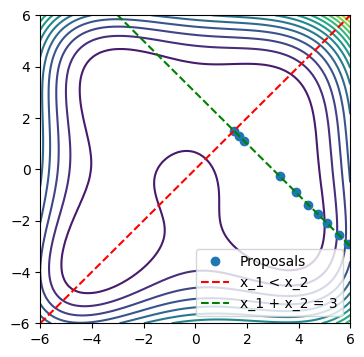

In [10]:
plt.figure(figsize=(4, 4))
plt.contour(benchmark_grid["x_1"].values.reshape((100, 100)), benchmark_grid["x_2"].values.reshape((100, 100)), benchmark_grid["y"].values.reshape((100, 100)), levels=20, label="true system response")
plt.plot(proposals["x_1"], proposals["x_2"], "o", label="Proposals")
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.plot((-6, 6), (-6, 6), "r--", label="x_1 < x_2")
plt.plot((-6, 6), (9, -3), "g--", label="x_1 + x_2 = 3")
plt.legend()
plt.show()

#### NChooseK Constraints are also handled by a repair function, using QP

In [11]:
domain = deepcopy(benchmark.domain)
domain.inputs.get_by_key("x_1").bounds = (0., 6.)
domain.inputs.get_by_key("x_2").bounds = (0., 6.)
domain.constraints.constraints += [
    constraints_data_models.NChooseKConstraint(
        features=["x_1", "x_2"],
        min_count=1,
        max_count=1,
        none_also_valid=True,
    ),
]

In [12]:
proposals = get_proposals(domain, n=10)

/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/pymoo/operators/crossover/sbx.py:47: RuntimeWarning: invalid value encountered in power
  betaq[mask] = np.power((rand * alpha), (1.0 / (eta + 1.0)))[mask]
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/pymoo/operators/crossover/sbx.py:47: RuntimeWarning: invalid value encountered in power
  betaq[mask] = np.power((rand * alpha), (1.0 / (eta + 1.0)))[mask]
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  war

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |      100 | -3.101430E+00 | -3.694822E+00
     2 |      200 | -3.385143E+00 | -3.696680E+00
     3 |      300 | -3.559765E+00 | -3.696680E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/pymoo/operators/crossover/sbx.py:47: RuntimeWarning: invalid value encountered in power
  betaq[mask] = np.power((rand * alpha), (1.0 / (eta + 1.0)))[mask]
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/pymoo/operators/crossover/sbx.py:47: RuntimeWarning: invalid value encountered in power
  betaq[mask] = np.power((rand * alpha), (1.0 / (eta + 1.0)))[mask]
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  war

     4 |      400 | -3.622916E+00 | -3.696680E+00
     5 |      500 | -3.647071E+00 | -3.704448E+00
     6 |      600 | -3.663931E+00 | -3.707656E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/pymoo/operators/crossover/sbx.py:47: RuntimeWarning: invalid value encountered in power
  betaq[mask] = np.power((rand * alpha), (1.0 / (eta + 1.0)))[mask]
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/pymoo/operators/crossover/sbx.py:47: RuntimeWarning: invalid value encountered in power
  betaq[mask] = np.power((rand * alpha), (1.0 / (eta + 1.0)))[mask]


     7 |      700 | -3.678811E+00 | -3.717334E+00
     8 |      800 | -3.689470E+00 | -3.733082E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/pymoo/operators/crossover/sbx.py:47: RuntimeWarning: invalid value encountered in power
  betaq[mask] = np.power((rand * alpha), (1.0 / (eta + 1.0)))[mask]
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


     9 |      900 | -3.698451E+00 | -3.740174E+00
    10 |     1000 | -3.704990E+00 | -3.740174E+00
    11 |     1100 | -3.712268E+00 | -3.750419E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/pymoo/operators/crossover/sbx.py:47: RuntimeWarning: invalid value encountered in power
  betaq[mask] = np.power((rand * alpha), (1.0 / (eta + 1.0)))[mask]
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/pymoo/operators/crossover/sbx.py:47: RuntimeWarning: invalid value encountered in power
  betaq[mask] = np.power((rand * alpha), (1.0 / (eta + 1.0)))[mask]


    12 |     1200 | -3.719051E+00 | -3.750419E+00
    13 |     1300 | -3.725340E+00 | -3.756295E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    14 |     1400 | -3.729747E+00 | -3.756295E+00
    15 |     1500 | -3.735360E+00 | -3.763273E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/pymoo/operators/crossover/sbx.py:47: RuntimeWarning: invalid value encountered in power
  betaq[mask] = np.power((rand * alpha), (1.0 / (eta + 1.0)))[mask]
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    16 |     1600 | -3.740710E+00 | -3.763273E+00
    17 |     1700 | -3.745392E+00 | -3.776279E+00
    18 |     1800 | -3.748920E+00 | -3.776279E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    19 |     1900 | -3.752525E+00 | -3.777166E+00
    20 |     2000 | -3.756591E+00 | -3.777166E+00
    21 |     2100 | -3.759616E+00 | -3.777166E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/pymoo/operators/crossover/sbx.py:47: RuntimeWarning: invalid value encountered in power
  betaq[mask] = np.power((rand * alpha), (1.0 / (eta + 1.0)))[mask]
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    22 |     2200 | -3.763244E+00 | -3.777166E+00
    23 |     2300 | -3.767275E+00 | -3.780645E+00
    24 |     2400 | -3.770429E+00 | -3.783930E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    25 |     2500 | -3.773713E+00 | -3.786193E+00
    26 |     2600 | -3.776476E+00 | -3.789481E+00
    27 |     2700 | -3.779291E+00 | -3.793734E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    28 |     2800 | -3.781716E+00 | -3.793734E+00
    29 |     2900 | -3.783939E+00 | -3.795437E+00
    30 |     3000 | -3.786300E+00 | -3.795437E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    31 |     3100 | -3.787939E+00 | -3.795641E+00
    32 |     3200 | -3.789589E+00 | -3.795641E+00
    33 |     3300 | -3.791316E+00 | -3.797951E+00
    34 |     3400 | -3.793244E+00 | -3.798423E+00
    35 |     3500 | -3.794465E+00 | -3.799191E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    36 |     3600 | -3.795346E+00 | -3.799191E+00
    37 |     3700 | -3.796125E+00 | -3.800853E+00
    38 |     3800 | -3.796918E+00 | -3.800853E+00
    39 |     3900 | -3.797818E+00 | -3.801169E+00
    40 |     4000 | -3.798731E+00 | -3.805139E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    41 |     4100 | -3.799550E+00 | -3.805139E+00
    42 |     4200 | -3.800176E+00 | -3.805595E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    43 |     4300 | -3.800920E+00 | -3.806492E+00
    44 |     4400 | -3.801606E+00 | -3.808198E+00
    45 |     4500 | -3.802519E+00 | -3.808975E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    46 |     4600 | -3.803700E+00 | -3.809081E+00
    47 |     4700 | -3.804680E+00 | -3.809081E+00
    48 |     4800 | -3.805821E+00 | -3.809081E+00
    49 |     4900 | -3.806504E+00 | -3.809359E+00
    50 |     5000 | -3.807255E+00 | -3.809359E+00
    51 |     5100 | -3.807901E+00 | -3.809669E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    52 |     5200 | -3.808528E+00 | -3.809707E+00
    53 |     5300 | -3.808924E+00 | -3.810551E+00
    54 |     5400 | -3.809165E+00 | -3.810606E+00
    55 |     5500 | -3.809352E+00 | -3.810612E+00
    56 |     5600 | -3.809543E+00 | -3.810833E+00
    57 |     5700 | -3.809751E+00 | -3.810925E+00
    58 |     5800 | -3.809956E+00 | -3.810949E+00
    59 |     5900 | -3.810232E+00 | -3.811076E+00
    60 |     6000 | -3.810511E+00 | -3.811076E+00
    61 |     6100 | -3.810705E+00 | -3.811149E+00
    62 |     6200 | -3.810853E+00 | -3.811392E+00
    63 |     6300 | -3.811007E+00 | -3.811392E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


    64 |     6400 | -3.811090E+00 | -3.811650E+00
    65 |     6500 | -3.811163E+00 | -3.811650E+00
    66 |     6600 | -3.811236E+00 | -3.811650E+00
    67 |     6700 | -3.811317E+00 | -3.811756E+00
    68 |     6800 | -3.811390E+00 | -3.811844E+00
    69 |     6900 | -3.811456E+00 | -3.811844E+00
    70 |     7000 | -3.811534E+00 | -3.811848E+00
    71 |     7100 | -3.811631E+00 | -3.811914E+00
    72 |     7200 | -3.811720E+00 | -3.812103E+00
    73 |     7300 | -3.811772E+00 | -3.812103E+00
    74 |     7400 | -3.811817E+00 | -3.812114E+00
    75 |     7500 | -3.811857E+00 | -3.812114E+00
    76 |     7600 | -3.811890E+00 | -3.812114E+00
    77 |     7700 | -3.811925E+00 | -3.812145E+00
    78 |     7800 | -3.811962E+00 | -3.812199E+00
    79 |     7900 | -3.811998E+00 | -3.812199E+00
    80 |     8000 | -3.812035E+00 | -3.812199E+00
    81 |     8100 | -3.812061E+00 | -3.812199E+00
    82 |     8200 | -3.812083E+00 | -3.812205E+00
    83 |     8300 | -3.812105E+00 | -3.812205E+00


/Users/gdiwt/mambaforge/envs/bofire/lib/python3.12/site-packages/pymoo/operators/crossover/sbx.py:47: RuntimeWarning: invalid value encountered in power
  betaq[mask] = np.power((rand * alpha), (1.0 / (eta + 1.0)))[mask]


    91 |     9100 | -3.812195E+00 | -3.812300E+00
    92 |     9200 | -3.812203E+00 | -3.812300E+00
    93 |     9300 | -3.812212E+00 | -3.812328E+00
    94 |     9400 | -3.812222E+00 | -3.812328E+00
    95 |     9500 | -3.812228E+00 | -3.812328E+00
    96 |     9600 | -3.812233E+00 | -3.812328E+00
    97 |     9700 | -3.812238E+00 | -3.812328E+00
    98 |     9800 | -3.812244E+00 | -3.812328E+00
    99 |     9900 | -3.812248E+00 | -3.812328E+00
   100 |    10000 | -3.812253E+00 | -3.812328E+00
Generated 10 experiments, Time taken: 9.80s


/var/folders/nz/mktm3tp93bb8z4cp_xyjgtzr0000gn/T/ipykernel_18205/1637011213.py:2: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(benchmark_grid["x_1"].values.reshape((100, 100)), benchmark_grid["x_2"].values.reshape((100, 100)), benchmark_grid["y"].values.reshape((100, 100)), levels=20, label="true system response")


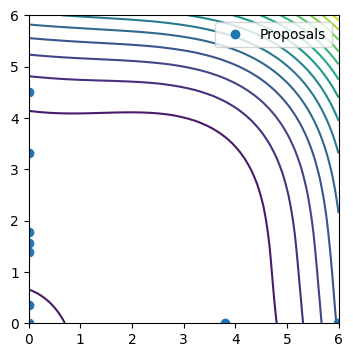

In [13]:
plt.figure(figsize=(4, 4))
plt.contour(benchmark_grid["x_1"].values.reshape((100, 100)), benchmark_grid["x_2"].values.reshape((100, 100)), benchmark_grid["y"].values.reshape((100, 100)), levels=20, label="true system response")
plt.plot(proposals["x_1"], proposals["x_2"], "o", label="Proposals")
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.legend()
plt.show()

#### Inequality Constraints are handled by the GA objctive function

In [18]:
domain = deepcopy(benchmark.domain)
domain.constraints.constraints += [
    constraints_data_models.NonlinearInequalityConstraint(
        expression="x_1**2 + x_2**2 - 16",
        features=["x_1", "x_2"],
    ),
]
proposals = get_proposals(domain, n=20)

n_gen  |  n_eval  |     cv_min    |     cv_avg    |     f_avg     |     f_min    
     1 |      100 |  9.195327E+01 |  2.147100E+02 |             - |             -
     2 |      200 |  8.907507E+01 |  1.674818E+02 |             - |             -
     3 |      300 |  7.039417E+01 |  1.436604E+02 |             - |             -
     4 |      400 |  7.039417E+01 |  1.242297E+02 |             - |             -
     5 |      500 |  6.328209E+01 |  1.066187E+02 |             - |             -
     6 |      600 |  2.845075E+01 |  9.067661E+01 |             - |             -
     7 |      700 |  2.845075E+01 |  7.774301E+01 |             - |             -
     8 |      800 |  2.747915E+01 |  6.596530E+01 |             - |             -
     9 |      900 |  2.690667E+01 |  5.527712E+01 |             - |             -
    10 |     1000 |  2.218825E+01 |  4.462690E+01 |             - |             -
    11 |     1100 |  8.9042679792 |  3.580255E+01 |             - |             -
    12 |     120

/var/folders/nz/mktm3tp93bb8z4cp_xyjgtzr0000gn/T/ipykernel_18205/3344335141.py:2: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(benchmark_grid["x_1"].values.reshape((100, 100)), benchmark_grid["x_2"].values.reshape((100, 100)), benchmark_grid["y"].values.reshape((100, 100)), levels=20, label="true system response")


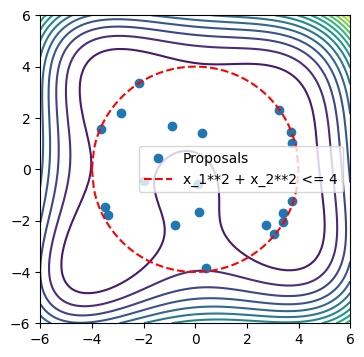

In [20]:
plt.figure(figsize=(4, 4))
plt.contour(benchmark_grid["x_1"].values.reshape((100, 100)), benchmark_grid["x_2"].values.reshape((100, 100)), benchmark_grid["y"].values.reshape((100, 100)), levels=20, label="true system response")
plt.plot(proposals["x_1"], proposals["x_2"], "o", label="Proposals")
x = np.linspace(-4, 4, 100)
y1 = np.sqrt(16 - x**2)
y2 = -y1
plt.plot(x, y1, "r--", label="x_1**2 + x_2**2 <= 4")
plt.plot(x, y2, "r--")
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.legend()
plt.show()
